This file loads the data sets from Chapter 1 of the book and generates the figures in the text.
First, Figure 1.

In [37]:
from ISLP import load_data
Wage = load_data('Wage')
Wage.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [38]:
import numpy as np
ages=np.unique(Wage['age'])
means = np.zeros(ages.shape[0])
for i in range(ages.shape[0]):
    means[i] = Wage.loc[lambda df: df['age']==ages[i],['wage']].mean()

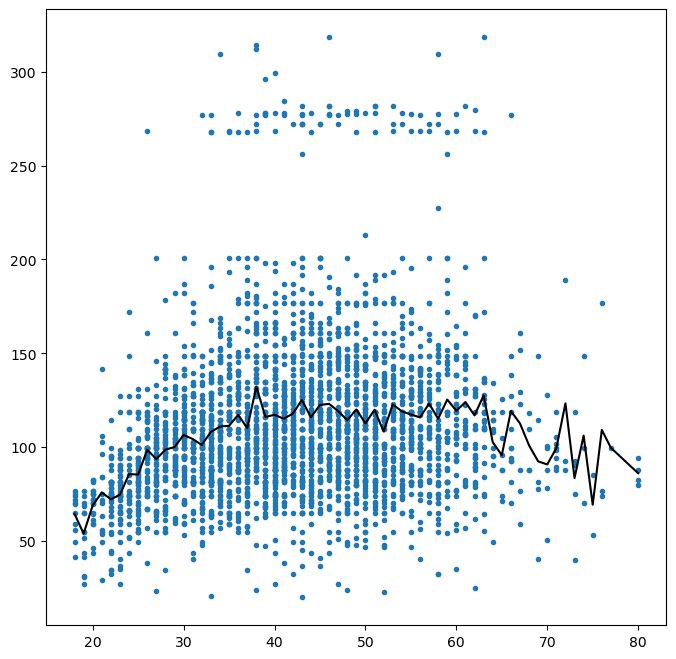

In [39]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8,8))
ax.plot(Wage.age,Wage.wage,'.')
ax.plot(ages,means,'k')

In [40]:
years=np.unique(Wage['year'])
means = np.zeros(years.shape[0])
for i in range(years.shape[0]):
    means[i] = Wage.loc[lambda df: df['year']==years[i],['wage']].mean()
years, means

(array([2003, 2004, 2005, 2006, 2007, 2008, 2009]),
 array([106.19828383, 111.15999687, 110.03785731, 114.2425793 ,
        112.89455609, 113.5519995 , 115.97177059]))

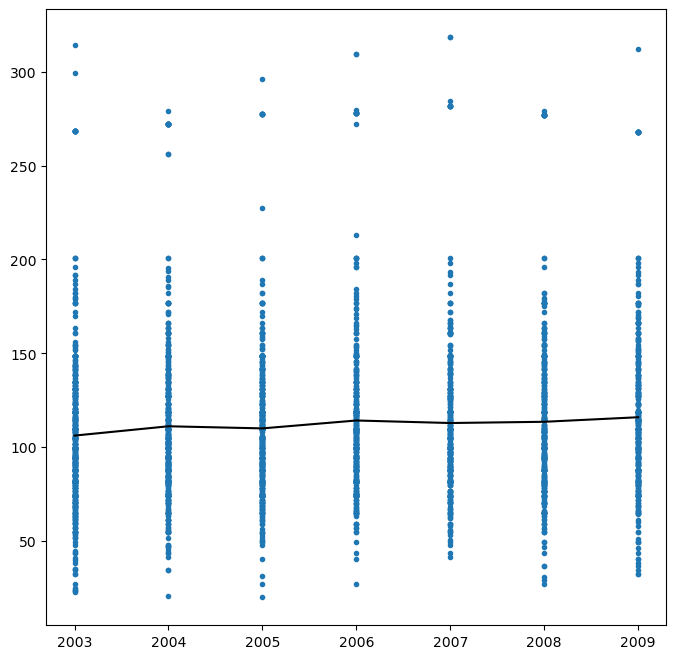

In [41]:
fig, ax = subplots(figsize=(8,8))
ax.plot(Wage.year,Wage.wage,'.')
ax.plot(years,means,'k')

<Axes: title={'center': 'wage'}, xlabel='education'>

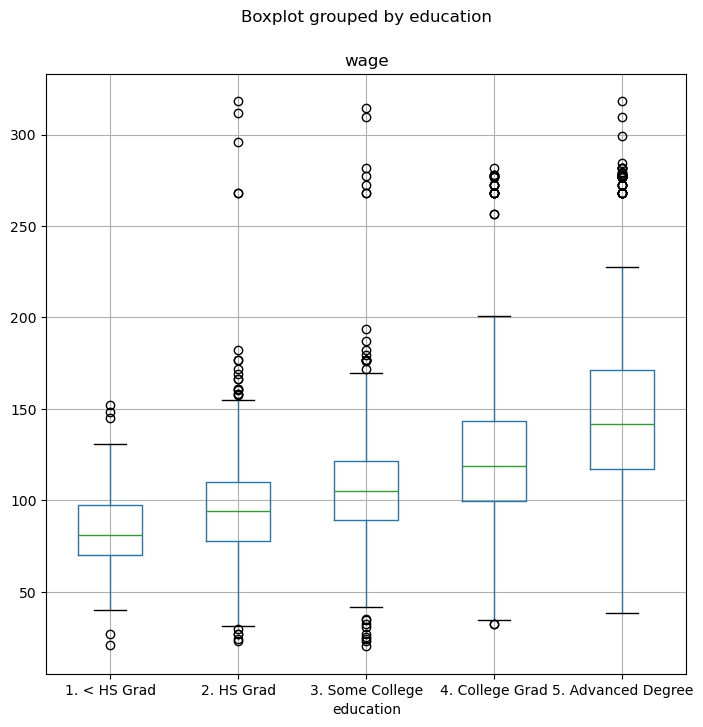

In [42]:
fig, ax = subplots(figsize=(8,8))
Wage.boxplot('wage', by='education',ax=ax)

Next, Figure 2.

In [43]:
from ISLP import load_data
Smarket = load_data('Smarket')
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [44]:
import pandas as pd
Smarket.Direction = pd.Series(Smarket.Direction,dtype='category')
Smarket.Direction.dtype

CategoricalDtype(categories=['Down', 'Up'], ordered=False)

<Axes: title={'center': 'Lag3'}, xlabel='Direction'>

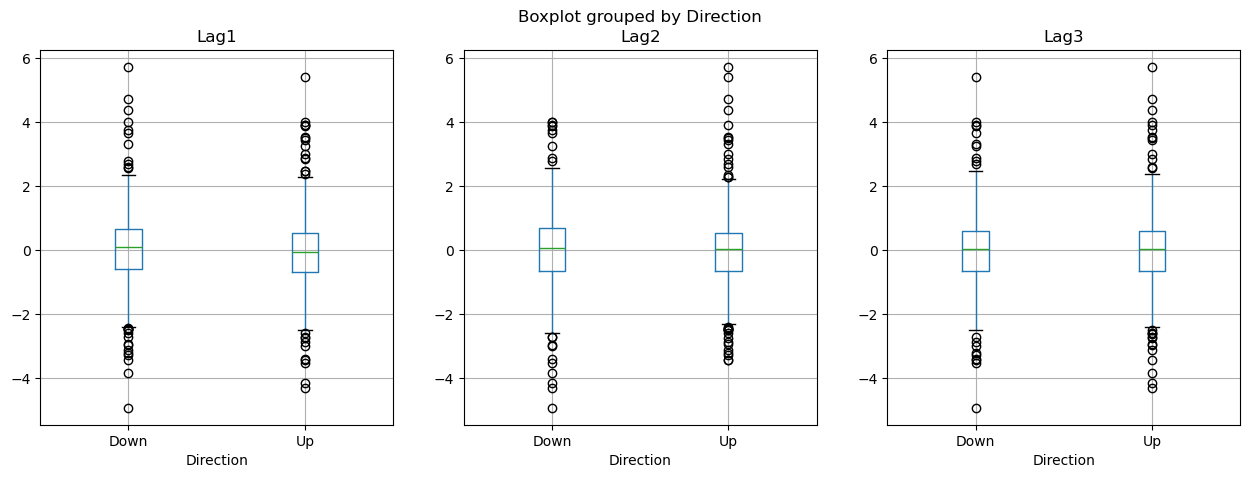

In [45]:
fig, axes = subplots(ncols = 3, figsize=(15,5))
Smarket.boxplot('Lag1', by='Direction', ax=axes[0])
Smarket.boxplot('Lag2', by='Direction', ax=axes[1])
Smarket.boxplot('Lag3', by='Direction', ax=axes[2])

Figure 3 presents results from a prediction model obtained using quadratic discriminant analysis (QDA) and the Smarket data set for determining whether the stock market will increase or decrease on a given day based on the previous five days performance. It is noted in Chapter 1 that the QDA model correctly predicts stock market performance 60% of the time. We will learn about QDA and return to this data set in Chapter 4.   

Next, Figure 4 clusters data collected from 64 cancel cell lines containing 6,830 gene expression measurements. We are not looking for a prediction here, but rather are trying to find natural groupings of the data. This is an UNSUPERVISED LEARNING problem. 

In [46]:
from ISLP import load_data
NCI60 = load_data('NCI60')
NCI60.keys()

dict_keys(['data', 'labels'])

In [47]:
NCI60['labels']

,label
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST
...,...
59,MELANOMA
60,MELANOMA
61,MELANOMA
62,MELANOMA


In [48]:
# Show the list of possible labels together with the number of lines corresponding to each label.
NCI60['labels'].value_counts()

label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
dtype: int64

In [49]:
# Extract the data for prostate cancer, which corresponds to 2 out of the 64 rows. 
indx = NCI60['labels']=='PROSTATE'
NCI60['data'][indx['label']]

array([[-0.53, -0.05, -0.23, ..., -0.26, -0.16,  0.82],
       [ 0.07,  0.29,  0.07, ...,  0.2 ,  0.15,  1.07]])